## 코드 작성

Python 코드를 작성하는 방법에 대한 예시입니다.

API KEY 를 설정합니다.

In [2]:
from dotenv import load_dotenv

load_dotenv()

True

## Text -> Python

이 코드는 `langchain` 라이브러리를 사용하여 챗봇 모델과 관련된 기능을 가져오고 있습니다. 

`ChatOpenAI` 클래스는 OpenAI의 챗봇 모델을 사용하기 위한 인터페이스를 제공합니다. 

`ChatPromptTemplate` 클래스는 챗봇에게 전달할 프롬프트를 생성하는 템플릿을 정의합니다. 

`StrOutputParser` 클래스는 챗봇의 출력을 문자열로 파싱하는 역할을 합니다. 

마지막으로 `PythonREPL` 클래스는 Python 코드를 실행하고 결과를 반환하는 기능을 제공하는 유틸리티입니다.

In [3]:
from langchain_openai import ChatOpenAI
from langchain.prompts import (
    ChatPromptTemplate,
)
from langchain_core.output_parsers import StrOutputParser
from langchain_experimental.utilities import PythonREPL

이 코드는 `ChatPromptTemplate` 클래스와 `ChatOpenAI` 클래스를 사용하여 사용자의 입력을 처리하고 대화형 AI 모델을 생성합니다. 

`ChatPromptTemplate.from_messages` 메소드는 시스템과 사용자의 메시지를 받아 프롬프트 템플릿을 형성하며, `ChatOpenAI` 클래스는 OpenAI의 챗봇 모델을 사용하여 대화를 생성하는 데 사용됩니다.

In [4]:
# ChatPromptTemplate 클래스에서 메시지를 기반으로 프롬프트 템플릿을 생성합니다.
template = """Write some python code to solve the user's problem. 

Return only python code in Markdown format, e.g.:

```python
....
```"""

# 이 클래스는 시스템 메시지와 인간의 메시지를 입력으로 받아 템플릿을 형성합니다.
prompt = ChatPromptTemplate.from_messages([("system", template), ("human", "{input}")])

# ChatOpenAI 클래스의 인스턴스를 생성합니다.
model = ChatOpenAI(model="gpt-4-1106-preview", temperature=0.1)

In [13]:
print(prompt.format(input="hello, world 를 출력해줘"))

System: Write some python code to solve the user's problem. 

Return only python code in Markdown format, e.g.:

```python
....
```
Human: hello, world 를 출력해줘


`_sanitize_output` 함수는 문자열을 입력받아, Markdown 형식의 코드 블록에서 실제 Python 코드 부분만을 추출하여 반환합니다. 이 함수는 Markdown 문자열 중 '```python'으로 시작하여 '```'으로 끝나는 부분을 찾아 해당 부분의 코드만을 분리해내는 역할을 합니다.

In [5]:
def _sanitize_output(text: str):
    # 입력된 텍스트에서 파이썬 코드 블록을 추출합니다.
    _, after = text.split("```python")
    # 추출된 코드 블록에서 코드 부분만 반환합니다.
    return after.split("```")[0]

변수 `chain`은 여러 처리 단계를 연결하는 파이프라인을 정의합니다. 이 파이프라인은 사용자의 입력(`prompt`)을 받아 모델(`model`)을 통해 처리하고, 문자열 출력 파서(`StrOutputParser()`)를 거쳐 출력을 정제하는 함수(`_sanitize_output`)를 적용한 후, 파이썬 REPL(`PythonREPL`)의 `run` 메서드를 실행합니다. 이 과정은 데이터나 명령어가 여러 처리 단계를 순차적으로 거치며 최종 결과를 도출하는 흐름을 나타냅니다.

In [6]:
class CustomStrOutputParser(StrOutputParser):
    def parse(self, output: str):
        # 입력된 텍스트에서 파이썬 코드 블록을 추출합니다.
        print(output)
        return super().parse(output)

In [14]:
# prompt에서 입력을 받아서 model을 통해 처리한 후 StrOutputParser()를 거쳐서
# _sanitize_output 함수를 적용하고, 최종적으로 PythonREPL의 run 메서드를 실행하는 처리 과정을 나타내는 파이프라인입니다.
code_chain = (
    prompt | model | CustomStrOutputParser() | _sanitize_output | PythonREPL().run
)

In [15]:
code_chain.invoke({"input": "hello, world 를 출력해줘"})

Python REPL can execute arbitrary code. Use with caution.


```python
print("hello, world")
```


'hello, world\n'

이 함수는 `chain` 객체의 `invoke` 메서드를 사용하여 문자열 입력을 처리합니다. `invoke` 메서드는 딕셔너리 형태의 인자를 받으며, 여기서 `input` 키에 해당하는 값을 처리합니다.

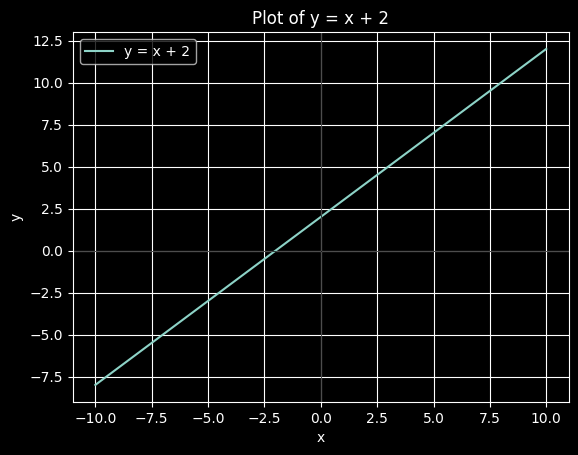

Certainly! To draw a plot of the function y = x + 2, you can use the `matplotlib` library in Python. If you haven't installed `matplotlib` yet, you can install it using `pip install matplotlib`. Here's a simple Python script that plots the function:

```python
import matplotlib.pyplot as plt
import numpy as np

# Create a range of x values
x = np.linspace(-10, 10, 200)

# Calculate the corresponding y values
y = x + 2

# Plot the function
plt.plot(x, y, label='y = x + 2')

# Add a title and labels
plt.title('Plot of y = x + 2')
plt.xlabel('x')
plt.ylabel('y')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()
```

This code will generate a plot of the linear function y = x + 2 over the range of x from -10 to 10. The `np.linspace` function is used to create an array of x values, and the corresponding y values are calculated using the equation of the line. The plot is then display

''

In [16]:
# chain 객체의 invoke 메서드를 호출하여 입력된 문자열을 처리합니다.
code_chain.invoke({"input": "draw a plot of y = x + 2"})

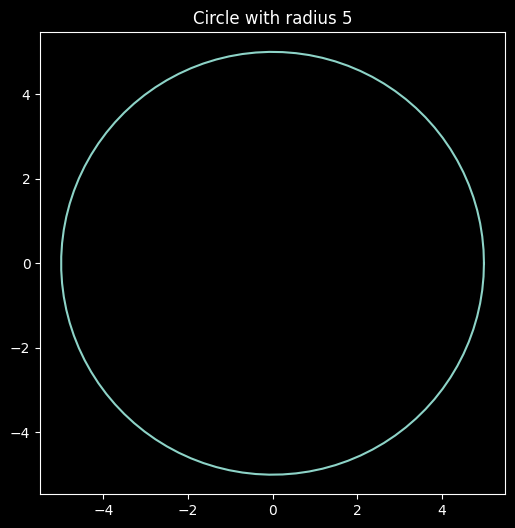

To draw a plot of a circle with a radius of 5, you can use the `matplotlib` library in Python. If you haven't already installed `matplotlib`, you can do so using `pip install matplotlib`. Here's a simple example of how to draw a circle with a radius of 5 using `matplotlib`:

```python
import matplotlib.pyplot as plt
import numpy as np

# Define the circle radius
radius = 5

# Create an array of angles from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Parametric equations for the circle
x = radius * np.cos(theta)
y = radius * np.sin(theta)

# Plot the circle
plt.figure(figsize=(6, 6))
plt.plot(x, y)

# Set equal scaling so the circle isn't distorted
plt.axis('equal')

# Set the title of the plot
plt.title('Circle with radius 5')

# Show the plot
plt.show()
```

This code will create and display a plot of a circle with a radius of 5 units. The `plt.axis('equal')` line ensures that the scaling on both axes is the same, so the circle isn't distorted.


''

In [17]:
# chain 객체의 invoke 메서드를 호출하여 입력된 문자열을 처리합니다.
code_chain.invoke({"input": "draw a plot of circle with radius 5"})

## Vision -> Code

이미지 입력을 파이썬 코드로 변환 하는 방법입니다.

여기서는 `GPT-4-vision-preview` 모델을 사용하여 이미지를 이해하고, 이해한 이미지를 바탕으로 파이썬 코드를 생성하여 실행합니다.

In [18]:
import os
import base64
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.runnables import (
    RunnablePassthrough,
    RunnableLambda,
    RunnableParallel,
    chain,
)

# Vision 모델을 사용하기 위한 ChatOpenAI 클래스의 인스턴스를 생성합니다.
vision_model = ChatOpenAI(
    model="gpt-4-vision-preview", temperature=0.1, max_tokens=8196
)

# 이미지 파일을 base64로 인코딩하는 함수입니다.


def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        img = base64.b64encode(image_file.read()).decode("utf-8")

    return f"data:image/jpeg;base64,{img}"


# 이미지 파일의 경로와 이미지 파일의 URL을 입력으로 받아서 처리하는 파이프라인입니다.
@chain
def vision_chain(inputs):
    image_path, url = str(inputs["image_path"]), bool(inputs["url"])
    vision_model = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=256)
    if url:
        image_url = image_path
    else:
        base64_image = encode_image(image_path)
        image_url = f"{base64_image}"
    system_message = SystemMessage(
        content=[
            """Write some python code to solve the user's problem. 

            Return only python code in Markdown format, e.g.:

            ```python
            ....
            ```"""
        ]
    )
    vision_message = HumanMessage(
        content=[
            {"type": "text", "text": "Can you write a python code to draw this plot?"},
            {
                "type": "image_url",
                "image_url": {
                    "url": image_url,
                    "detail": "auto",
                },
            },
        ]
    )
    output = vision_model.invoke([system_message, vision_message])
    return output.content

이제 입력된 이미지 파일의 경로와 이미지 파일의 URL을 입력으로 받아서 처리하는 파이프라인을 실행합니다.

In [19]:
final_chain = (
    vision_chain | CustomStrOutputParser() | _sanitize_output | PythonREPL().run
)

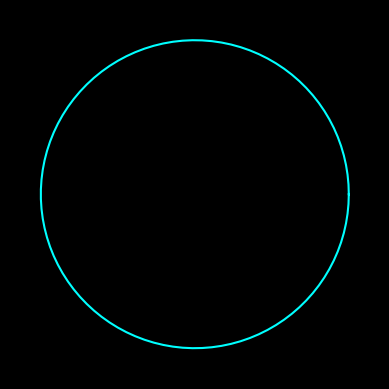

Certainly! You can use Python's matplotlib library to draw a circle plot as shown in the image. Here's a simple example code to create such a plot:

```python
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and an axis
fig, ax = plt.subplots()

# Set an aspect ratio to 'equal' to make the circle look round
ax.set_aspect('equal')

# Define the radius of the circle
radius = 5

# Generate the circle using a parametric equation
theta = np.linspace(0, 2*np.pi, 100)
x = radius * np.cos(theta)
y = radius * np.sin(theta)

# Plot the circle
ax.plot(x, y, color='cyan')

# Set the limits of the plot to make it look like the provided image
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

# Remove the axis
ax.axis('off')

# Display the plot
plt.show()
```

This code will draw a circle with a radius of 5 and set the limits of the x and y axes to -6 to 6, respectively. The background is black, and the circle is shown in cyan with the axes turned off to match


''

In [20]:
# 이미지 경로를 입력으로 사용하여 final_chain 객체의 invoke 메서드를 호출합니다.
image_path = "output.png"
final_chain.invoke({"image_path": image_path, "url": False})

이미지 URL을 입력으로 사용하여 final_chain 객체의 invoke 메서드를 호출합니다.

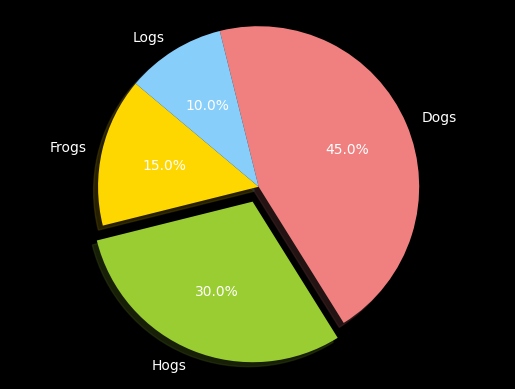

To draw a pie chart similar to the one in the image, you can use the following Python code with the help of the `matplotlib` library. If you haven't installed the `matplotlib` library yet, you can install it using `pip install matplotlib`.

```python
import matplotlib.pyplot as plt

# Data to plot
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0)  # explode 1st slice (Hogs)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()
```

This code defines the labels and corresponding sizes for each section of the pie chart, colors, and a small 'explode' effect for the 'Hogs' slice to make it stand out. It then plots the pie chart, ensuring the aspect ratio is equal so that the pie chart is circular. Finally, it displays the plot


''

In [22]:
final_chain.invoke(
    {
        "image_path": "https://matplotlib.org/stable/_images/sphx_glr_pie_features_001.png",
        "url": True,
    }
)